<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/data/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Initial Setup and Data Loading
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

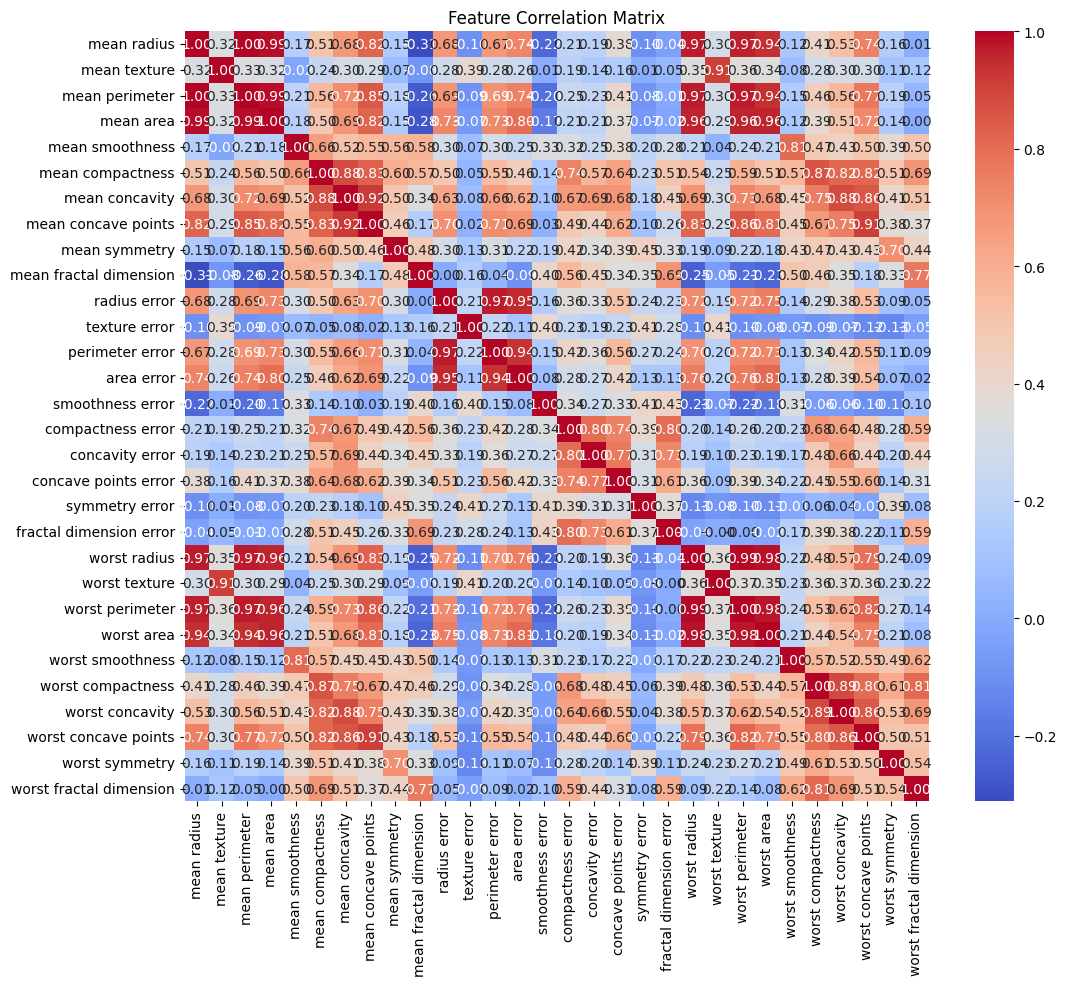

In [2]:
# 2. Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [3]:
# 3. Correlation with Target Variable
# Calculate correlation between features and target
correlation_with_target = pd.DataFrame({
    'feature': X.columns,
    'correlation': [np.corrcoef(X[col], y)[0,1] for col in X.columns]
})

print("Correlation with target variable:")
print(correlation_with_target.sort_values('correlation', ascending=False))

Correlation with target variable:
                    feature  correlation
14         smoothness error     0.067016
9    mean fractal dimension     0.012838
11            texture error     0.008303
18           symmetry error     0.006522
19  fractal dimension error    -0.077972
16          concavity error    -0.253730
15        compactness error    -0.292999
29  worst fractal dimension    -0.323872
8             mean symmetry    -0.330499
4           mean smoothness    -0.358560
17     concave points error    -0.408042
1              mean texture    -0.415185
28           worst symmetry    -0.416294
24         worst smoothness    -0.421465
21            worst texture    -0.456903
13               area error    -0.548236
12          perimeter error    -0.556141
10             radius error    -0.567134
25        worst compactness    -0.590998
5          mean compactness    -0.596534
26          worst concavity    -0.659610
6            mean concavity    -0.696360
3                 mean 

In [4]:
# 4. Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})

print("\nRandom Forest Feature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Random Forest Feature Importance:
                    feature  importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  w

<Figure size 1000x600 with 0 Axes>

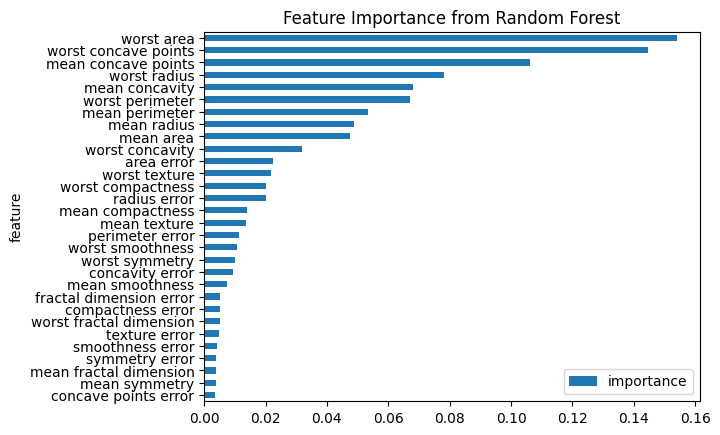

In [5]:
# 5. Visualize Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values('importance', ascending=True).plot(
    x='feature', y='importance', kind='barh'
)
plt.title('Feature Importance from Random Forest')
plt.show()

In [6]:
# 6. Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Initialize and fit RFE
estimator = LogisticRegression(random_state=42)
selector = RFECV(estimator=estimator, step=1, cv=5)
selector = selector.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X.columns[selector.support_]
print("\nSelected features using RFE:")
print(selected_features)


Selected features using RFE:
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'mean symmetry', 'radius error', 'texture error', 'perimeter error',
       'area error', 'smoothness error', 'compactness error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst concavity', 'worst concave points',
       'worst symmetry'],
      dtype='object')


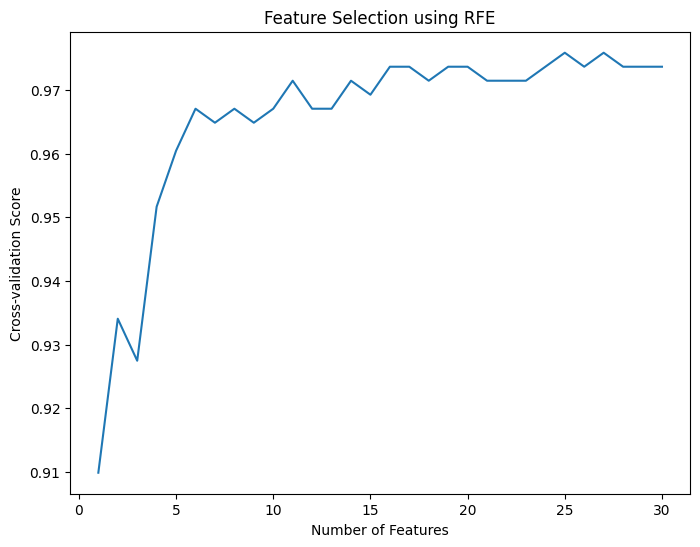

In [9]:
# 7. Plot RFE Results
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1),
         selector.cv_results_['mean_test_score'])
plt.xlabel('Number of Features')
plt.ylabel('Cross-validation Score')
plt.title('Feature Selection using RFE')
plt.show()

In [10]:
# 8. Statistical Feature Selection (SelectKBest)
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest
k_best = SelectKBest(score_func=f_classif, k=10)
X_new = k_best.fit_transform(X_train_scaled, y_train)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': k_best.scores_
})
print("\nFeature scores using F-test:")
print(feature_scores.sort_values('Score', ascending=False))


Feature scores using F-test:
                    Feature       Score
27     worst concave points  746.492117
7       mean concave points  695.179785
22          worst perimeter  681.263759
20             worst radius  645.350668
2            mean perimeter  522.489267
23               worst area  495.787667
0               mean radius  482.233945
3                 mean area  423.654133
6            mean concavity  396.662370
26          worst concavity  331.330906
5          mean compactness  242.589647
25        worst compactness  240.492785
10             radius error  186.591816
12          perimeter error  176.223231
13               area error  165.307401
21            worst texture  126.681903
28           worst symmetry  108.953927
24         worst smoothness  102.973429
1              mean texture   94.917788
17     concave points error   76.565923
4           mean smoothness   74.190147
8             mean symmetry   62.469542
29  worst fractal dimension   49.197922
15        

In [11]:
# 9. PCA Dimensionality Reduction
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_train_scaled)

# Print explained variance ratio
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)


Explained variance ratio:
[0.43502782 0.19500007 0.09781519 0.06486409 0.05253378 0.041128
 0.0223559  0.01647952 0.01380052 0.01205262]


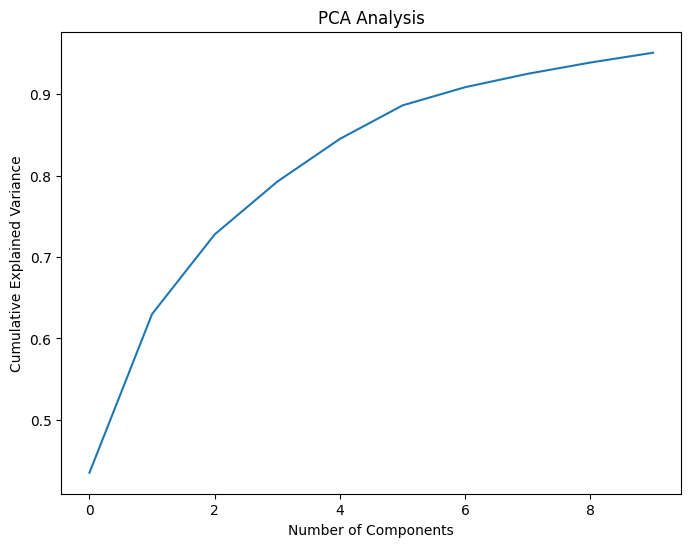

In [12]:
# 10. Plot PCA Cumulative Variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Analysis')
plt.show()

In [13]:
# 11. Evaluate Different Feature Selection Methods
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def evaluate_feature_set(X_train, X_test, y_train, y_test):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Evaluate original features
original_score = evaluate_feature_set(X_train_scaled, X_test_scaled, y_train, y_test)

# Evaluate RFE selected features
X_train_rfe = selector.transform(X_train_scaled)
X_test_rfe = selector.transform(X_test_scaled)
rfe_score = evaluate_feature_set(X_train_rfe, X_test_rfe, y_train, y_test)

# Evaluate SelectKBest features
X_train_kbest = k_best.transform(X_train_scaled)
X_test_kbest = k_best.transform(X_test_scaled)
kbest_score = evaluate_feature_set(X_train_kbest, X_test_kbest, y_train, y_test)

# Print results
print("\nModel Performance Comparison:")
print(f"Original features: {original_score:.4f}")
print(f"RFE selected features: {rfe_score:.4f}")
print(f"KBest selected features: {kbest_score:.4f}")


Model Performance Comparison:
Original features: 0.9737
RFE selected features: 0.9737
KBest selected features: 0.9737


# Dimention Reduction

In [15]:
# 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [16]:
# 2: Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# 3: Define plotting function
def plot_2d_space(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1] if X.shape[1] > 1 else np.zeros_like(X[:, 0]),
                         c=y, cmap='viridis')
    plt.colorbar(scatter)
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.title(title)
    plt.show()

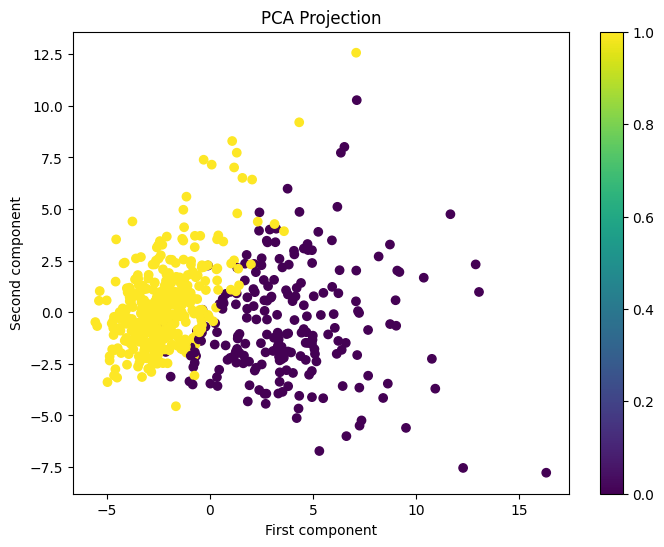

Explained variance ratio (PCA): [0.44272026 0.18971182]


In [19]:
# 4: PCA
start_time = time.time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_time = time.time() - start_time
plot_2d_space(X_pca, y, 'PCA Projection')
print(f"Explained variance ratio (PCA): {pca.explained_variance_ratio_}")

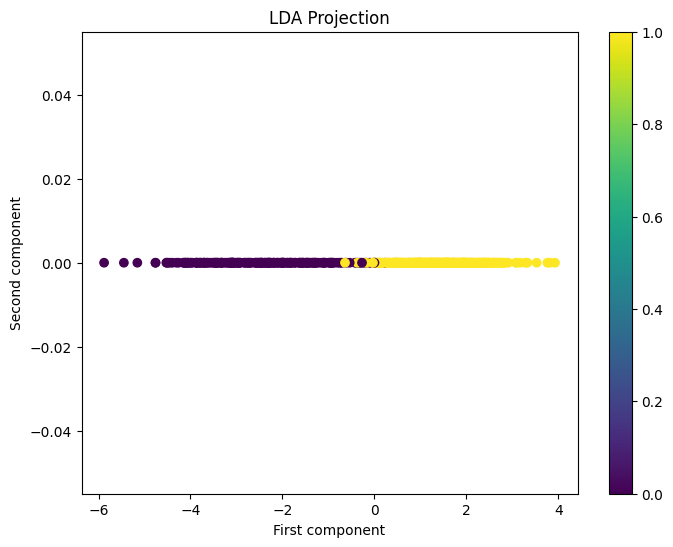

In [20]:
# 5: LDA
start_time = time.time()
lda = LDA(n_components=1)  # Note: changed to 1 for binary classification
X_lda = lda.fit_transform(X_scaled, y)
lda_time = time.time() - start_time
plot_2d_space(X_lda, y, 'LDA Projection')

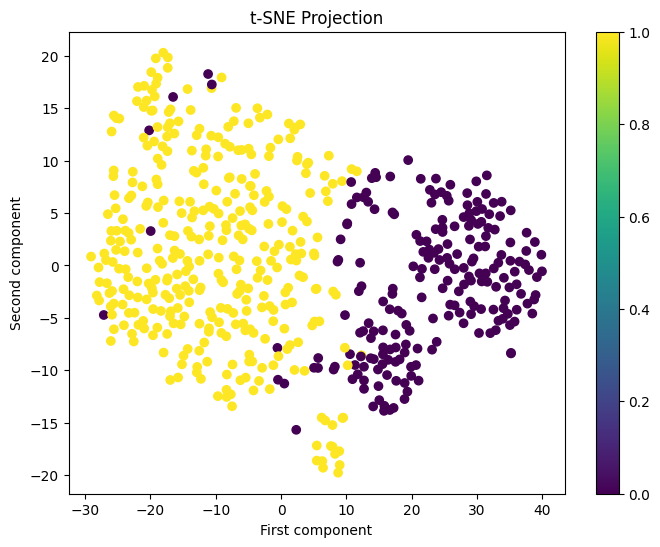

In [21]:
# 6: t-SNE
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
tsne_time = time.time() - start_time
plot_2d_space(X_tsne, y, 't-SNE Projection')

In [22]:
# 7: Create and display comparison table
comparison_data = {
    'Method': ['PCA', 'LDA', 't-SNE'],
    'Computation Time (s)': [pca_time, lda_time, tsne_time],
    'Supervised/Unsupervised': ['Unsupervised', 'Supervised', 'Unsupervised'],
    'Linear/Non-linear': ['Linear', 'Linear', 'Non-linear'],
    'Preserves': ['Global structure', 'Class separability', 'Local structure'],
    'Scalability': ['Good', 'Good', 'Poor'],
    'Interpretability': ['High', 'High', 'Low']
}

comparison_df = pd.DataFrame(comparison_data)
print("\nComparison of Dimensionality Reduction Methods:")
print(comparison_df.to_string(index=False))


Comparison of Dimensionality Reduction Methods:
Method  Computation Time (s) Supervised/Unsupervised Linear/Non-linear          Preserves Scalability Interpretability
   PCA              0.004780            Unsupervised            Linear   Global structure        Good             High
   LDA              0.037051              Supervised            Linear Class separability        Good             High
 t-SNE              6.237205            Unsupervised        Non-linear    Local structure        Poor              Low
